## Topic 5: Anomaly Detection









       Anomaly (or outlier) detection is the data-driven task of identifying these rare occurrences and filtering or modulating them from the analysis pipeline. Such anomalous events can be connected to some fault in the data source, such as financial fraud, equipment fault, or irregularities in time series analysisAnomaly detection is an important task in machine learning, and various techniques can be employed depending on the nature of the data and the availability of labeled examples. 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
 

In [6]:
data = pd.read_csv("./iris.csv")
df = data[["sepal_length", "sepal_width"]]
print(df.describe())

       sepal_length  sepal_width
count    150.000000   150.000000
mean       5.843333     3.054000
std        0.828066     0.433594
min        4.300000     2.000000
25%        5.100000     2.800000
50%        5.800000     3.000000
75%        6.400000     3.300000
max        7.900000     4.400000


 Predicted outliers from this data:

In [10]:
model = OneClassSVM(kernel = 'rbf' , gamma = 0.001, nu = 0.05).fit(df)
y_pred = model.predict(df)

In [15]:
anomaly_values = df.iloc[np.where(y_pred == -1)]
print(anomaly_values)

     sepal_length  sepal_width
8             4.4          2.9
13            4.3          3.0
41            4.5          2.3
117           7.7          3.8
118           7.7          2.6
131           7.9          3.8


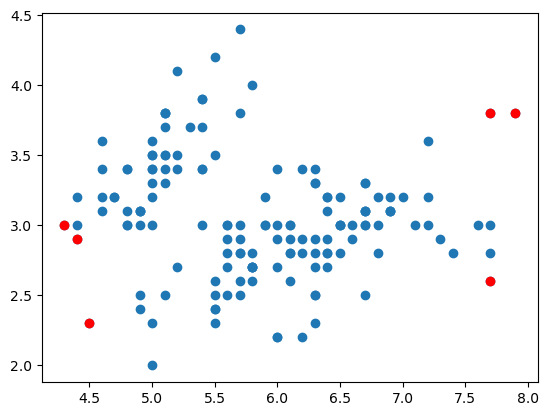

In [17]:
plt.scatter(df["sepal_length"], df["sepal_width"])
plt.scatter(anomaly_values["sepal_length"], anomaly_values["sepal_width"], c = "r")

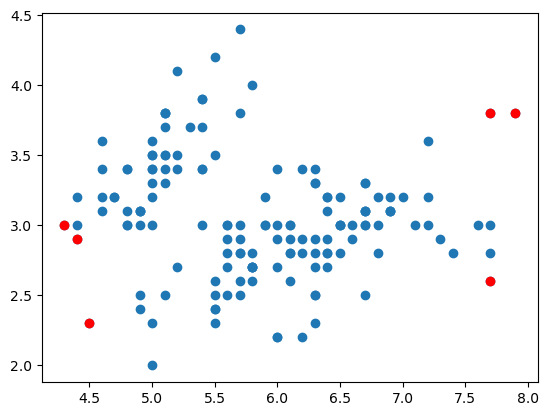

In [21]:
plt.scatter(df["sepal_length"], df["sepal_width"])
plt.scatter(anomaly_values["sepal_length"], anomaly_values["sepal_width"], c = "r") 

Anomaly Detection for  Credit Card Dataset

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [17]:
X = pd.read_csv(".//CC GENERAL.csv")
X = X.drop('CUST_ID', axis = 1)

X.fillna(method = 'ffill', inplace = True)

print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [31]:
print(X.columns)
print(f"number of rows: {len(X)}")

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
number of rows: 8950


In [64]:
X.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.394205,1733.143852,865.225790,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.616165,2895.063757,2376.929826,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.488256,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.096808,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,815.375602,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [18]:
scaler = StandardScaler()

X_s = scaler.fit_transform(X)
X_norm = pd.DataFrame(normalize(X_s))


In [70]:
pca = PCA(n_components = 2) 
X_reduce = pca.fit_transform(X_norm)
X_reduce = pd.DataFrame(X_reduce)
X_reduce.columns = list([f'P{i}' for i in range(1, len(X_reduce.columns)+1)])

In [68]:

db_model = DBSCAN(eps = 0.05, min_samples = 10).fit(X_reduce)
labels = db_model.labels_

In [69]:
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [71]:
np.histogram(labels, bins=len(np.unique(labels)))

(array([  39, 8903,    8], dtype=int64),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]))

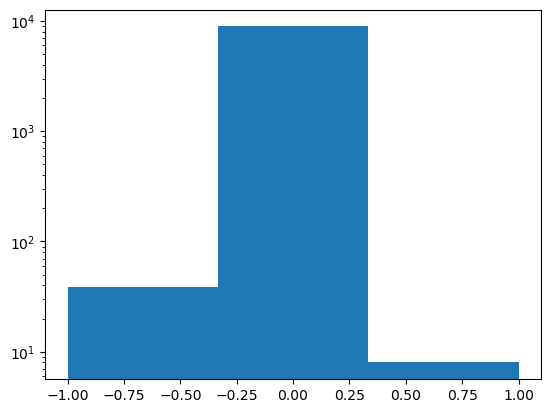

In [72]:
plt.hist(labels, bins=len(np.unique(labels)), log=True)
plt.show()

In [73]:
n_clusters = len(np.unique(labels))-1
anomaly = list(labels).count(-1)
print(f'Clusters: {n_clusters}')
print(f'Abnormal points: {anomaly}')

Clusters: 2
Abnormal points: 39


In [74]:
X_anomaly = X.iloc[np.argwhere(labels==-1).reshape((-1,))]
print(X_anomaly.head())

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
86   7069.950386                1.0    1603.78           1445.14   
87   8181.251131                1.0    2258.01           1318.78   
109  6644.201651                1.0    4478.75           2721.59   
120  8504.876253                1.0    6724.26           4100.08   
468  6426.639738                1.0    4462.86           2816.46   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
86                   158.64   5626.004046                  1.0   
87                   939.23   5251.228934                  1.0   
109                 1757.16   7205.520805                  1.0   
120                 2624.18   1686.599777                  1.0   
468                 1646.40   4599.625146                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
86                     0.833333                          1.000000   
87                     0.750000                         

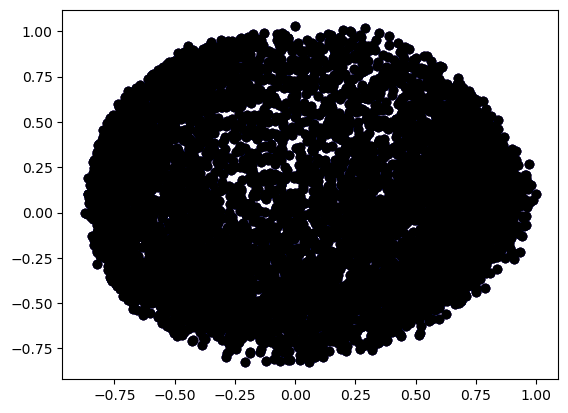

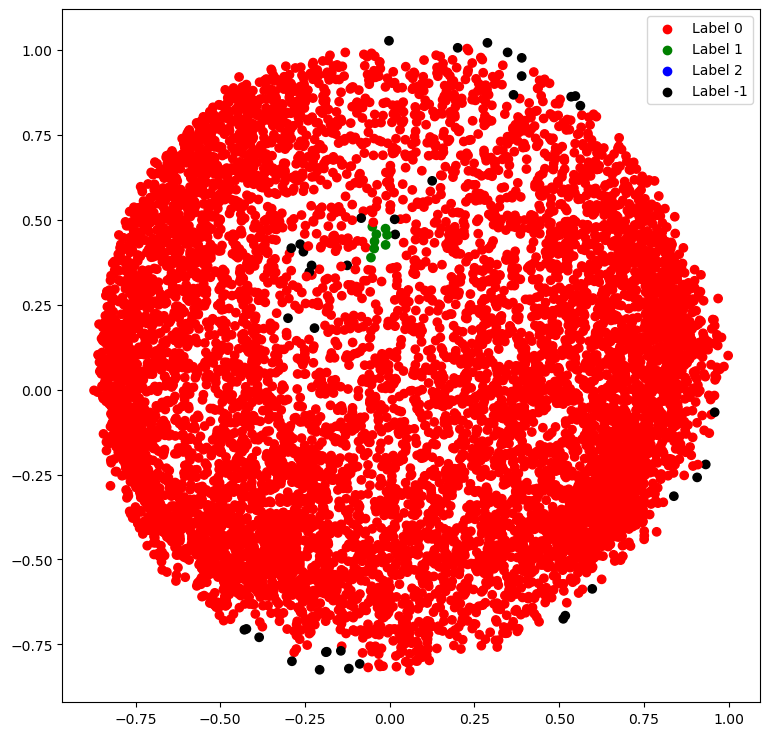

In [75]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_reduce['P1'], X_reduce['P2'], color ='r');
g = plt.scatter(X_reduce['P1'], X_reduce['P2'], color ='g');
b = plt.scatter(X_reduce['P1'], X_reduce['P2'], color ='b');
k = plt.scatter(X_reduce['P1'], X_reduce['P2'], color ='k');

plt.figure(figsize =(9, 9))
plt.scatter(X_reduce['P1'], X_reduce['P2'], c = cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()